In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from time import time
from __future__ import print_function


In [3]:
full_ques_set= pd.read_csv('../data/processed/predicted_by_svm_full_ques_set.csv')

In [4]:
full_ques_set

,Post Link,Predicted Category,Tags,Title,Body,Score,ViewCount
0,111102,f3,"['javascript', 'scope', 'closures']",How do JavaScript closures work?,<p>How would you explain JavaScript closures t...,7087,960479.0
1,503093,f3,"['javascript', 'jquery', 'redirect']",How do I redirect to another page in JavaScrip...,<p>How can I redirect the user from one page t...,6075,3529104.0
2,1789945,f3,"['javascript', 'string', 'substring', 'string-...",How to check if one string contains another su...,"<p>Usually, I would expect a <code>String.cont...",5685,3558952.0
3,1335851,f3,"['javascript', 'syntax', 'jslint', 'use-strict']","What does ""use strict"" do in JavaScript, and w...","<p>Recently, I ran some of my JavaScript code ...",5334,739520.0
4,178325,f3,"['javascript', 'jquery', 'dom', 'visibility']",How do I check if an element is hidden in jQuery?,<p>It is possible to toggle the visibility of ...,5317,1706552.0
5,336859,f3,"['javascript', 'function', 'syntax', 'idioms']",JavaScript function declaration syntax: var fn...,<p>I've recently started maintaining someone e...,4768,714696.0
6,14994391,f6,"['javascript', 'jquery', 'angularjs', 'design']","""Thinking in AngularJS"" if I have a jQuery bac...",<p>Suppose I'm familiar with developing client...,4535,706186.0
7,359494,f3,"['javascript', 'operators', 'equality', 'equal...",Which equals operator (== vs ===) should be us...,"<p>I'm using <a href=""http://en.wikipedia.org/...",4353,989836.0
8,5767325,f3,"['javascript', 'arrays']",How to remove a particular element from an arr...,"<p>I have an array of integers, which I'm usin...",3886,2906474.0
9,208105,f3,"['javascript', 'javascript-objects', 'object-p...",How to remove a property from a JavaScript obj...,<p>Say I create an object as follows: </p>\n\n...,3554,1118601.0


In [6]:
# Preparing data for clustering (here-- 'f3' or 'javascript family')
f3_category_data = full_ques_set[full_ques_set['Predicted Category'].apply(lambda x: x=='f3')]['Title']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import HashingVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer

t0 = time()

# # case 1
# # Perform an IDF normalization on the output of HashingVectorizer
# hasher = HashingVectorizer(n_features=opts.n_features,
#                            stop_words='english', non_negative=True,
#                            norm=None, binary=False)
# vectorizer = make_pipeline(hasher, TfidfTransformer())

# # case 2
# # Perform HashingVectorizer (not IDF normalization on the output)
# vectorizer = HashingVectorizer(n_features=opts.n_features,
#                                stop_words='english',
#                                non_negative=False, norm='l2',
#                                binary=False)


# case 3
# Vectorizing without using HashingVectorizer     (max_features=opts.n_features,)
vectorizer = TfidfVectorizer(max_df=0.5,
                             min_df=2, stop_words='english',
                             use_idf= True)

# fit anf transform data    
X = vectorizer.fit_transform(f3_category_data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)


done in 1.639595s
n_samples: 63506, n_features: 7577


In [8]:
# Dimension Reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

n_components=3

print("Performing dimensionality reduction using LSA")
t0 = time()
# Vectorizer results are normalized, which makes KMeans behave as
# spherical k-means for better results. Since LSA/SVD results are
# not normalized, we have to redo the normalization.
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

print("done in %fs" % (time() - t0))

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))
print("n_samples: %d, n_features: %d" % X.shape)

Performing dimensionality reduction using LSA
done in 0.943824s
Explained variance of the SVD step: 2%
n_samples: 63506, n_features: 3


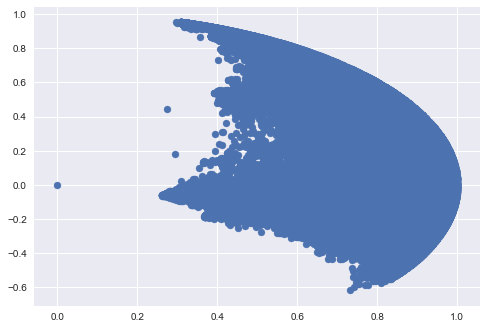

In [9]:
# Plotting 2D data after dimension reduction

plt.scatter(X[:,0], X[:,1])
plt.show()

/media/harsh/harsh-Exhd/softwares/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


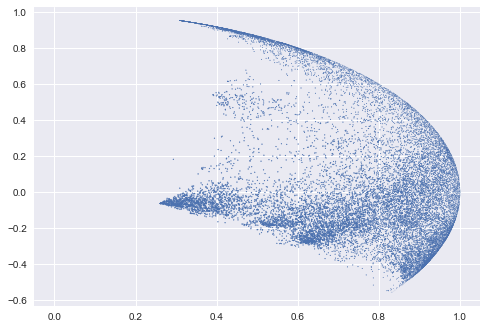

In [10]:
# Plotting 3D data after dimension reduction

plt.scatter(X[:,0], X[:,1], X[:,2])
plt.show()

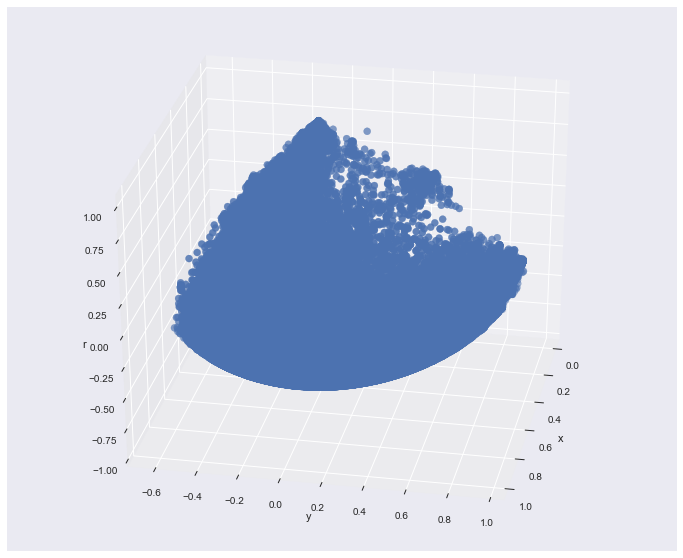

In [11]:
from mpl_toolkits import mplot3d
from ipywidgets import interact

# Z_predict = km.predict(X)

def plot_3D(elev=30, azim=30):
    plt.figure(figsize=(12,10))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=50, cmap='Accent_r')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

In [12]:
# Applying k-means clustering

n_clusters = 20

# # Using Minibatch for clustering
# from sklearn.cluster import MiniBatchKMeans
# km = MiniBatchKMeans(n_clusters=n_clusters, init='k-means++', n_init=1,
#                      init_size=1000, batch_size=1000, verbose= True)


# Using KMeans for clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters= n_clusters, init='k-means++', max_iter=100, n_init=1,
            verbose= True)


print("Clustering sparse data with %s" % km)
t0 = time()

# Fitting data into algorithm
km.fit(X)
print("done in %0.3fs" % (time() - t0))

# These metric can only be calculated when we want to cross check the accuracy of the clustered model when we
# are aware about 'labels' of the data beforehand

# print(" Printing some metric values from the learnt model... ")

# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
# print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
# print("Adjusted Rand-Index: %.3f"
#       % metrics.adjusted_rand_score(labels, km.labels_))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, km.labels_, sample_size=1000))

# print(" All metric printed ")

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=20, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1231.11030631
start iteration
done sorting
end inner loop
Iteration 1, inertia 1151.67527548
start iteration
done sorting
end inner loop
Iteration 2, inertia 1129.24697851
start iteration
done sorting
end inner loop
Iteration 3, inertia 1111.34214591
start iteration
done sorting
end inner loop
Iteration 4, inertia 1094.10686356
start iteration
done sorting
end inner loop
Iteration 5, inertia 1081.43527637
start iteration
done sorting
end inner loop
Iteration 6, inertia 1073.06588369
start iteration
done sorting
end inner loop
Iteration 7, inertia 1067.79212521
start iteration
done sorting
end inner loop
Iteration 8, inertia 1064.18510543
start iteration
done sorting
end inner loop
Iterat

In [13]:
# if not opts.use_hashing:
print("Top terms per cluster:")

# case 1
# when the dimension was reduced by n_components:
original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]

# # case 2
# # Another case when the dimension was not reduced by n_components:
# order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(n_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: jquery element using div select event click class text ui value change elements html input add remove mobile page id
Cluster 1: javascript jquery using function object array html element value ajax string event does use div page file text json change
Cluster 2: jquery ajax using function ui working data mobile form event net use value asp click page post plugin button json
Cluster 3: javascript using function object element array html string value jquery does variable div file text event check use css page
Cluster 4: element div select class jquery using text event html elements click value change javascript id remove check child parent dom
Cluster 5: javascript jquery function ajax using object array string json data use html file does working value net page asp form
Cluster 6: jquery ajax using ui working function event mobile select div click data form value change button page plugin use elements
Cluster 7: jquery javascript element using div html s

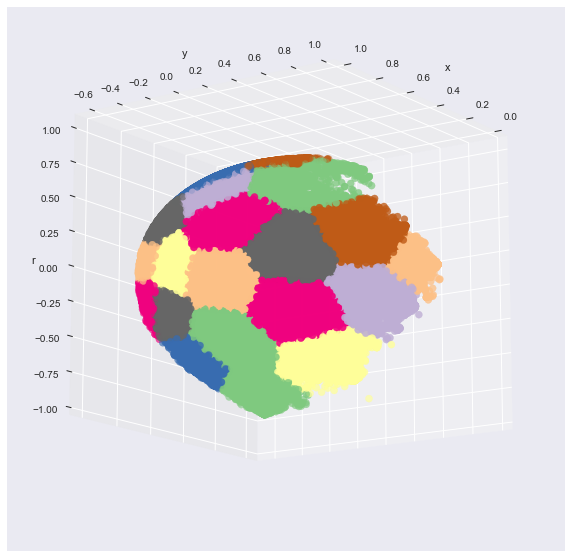

In [14]:
# Plotting clustered data on a 3-D plot

Z_predict = km.predict(X)

def plot_3D(elev=30, azim=30):
    plt.figure(figsize=(10,10))

    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=Z_predict, s=50, cmap='Accent_r')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

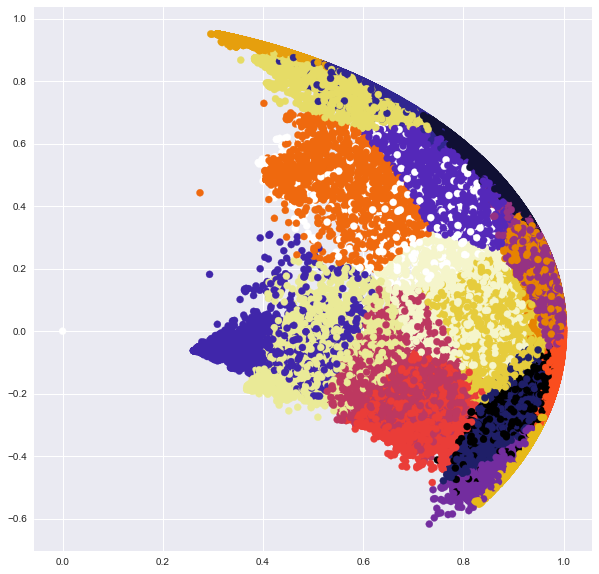

In [15]:
# Plotting clustered data on a 2-D plot when n_components = 2

Z_predict = km.predict(X)
plt.figure(figsize=(10,10))


plt.scatter(X[:,0], X[:,1], c=Z_predict, s=50, cmap='CMRmap')
plt.show()

In [ ]:
# Top 10 terms per cluster with n_components=3
# Cluster 0: jquery ajax using ui function working event mobile div form
# Cluster 1: javascript function object using array string html does value variable
# Cluster 2: jquery element using div select event ui ajax click value
# Cluster 3: jquery ajax function using working data ui net form asp
# Cluster 4: javascript jquery using function object element array html value string
# Cluster 5: element jquery select div class using text event value html
# Cluster 6: jquery javascript using function ajax object value event html ui
# Cluster 7: jquery ajax function using ui working data form mobile net
# Cluster 8: javascript jquery function ajax using object array does string data
# Cluster 9: jquery element javascript using div select event class text value